## Tugas 06 Data Mining

Nama: Muh. Yusuf Syam<br>
NIM: H071191044

<h1 align="center"> Preprocessing Data Tidak Terstruktur </h1><br>

Data tidak terstruktur merupakan data yang kualitatif, artinya tidak dapat diolah atau dianalisis dengan alat dan metode konvensional. Data tidak terstruktur sulit untuk didekonstruksi karena tidak memiliki model yang telah ditentukan, sehingga data harus disimpan dalam format aslinya. Contoh data tidak terstruktur seperti data citra, teks, audio dan video.

## 1. Data Citra

Mengimport library yang diperlukan untuk preprocess data citra

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Membaca data citra lalu menampilkannya

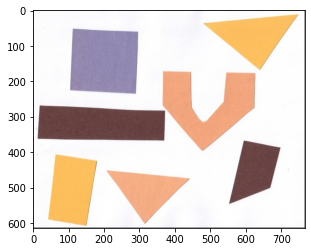

In [2]:
img= cv.cvtColor(cv.imread('shape.jpg'), cv.COLOR_BGR2RGB)

plt.imshow(img)

Mengubah citra menjadi citra grayscale lalu mengaplikasikan 5 threshold berbeda dengan nilai batas threshold yang telah dideklarasikan sebelumnya. Setelah itu ditampilkan

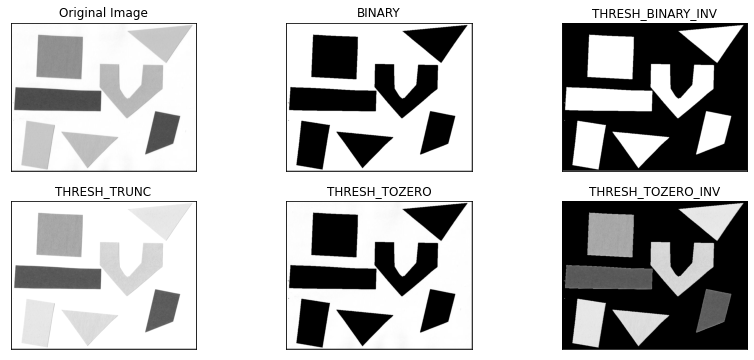

In [3]:
gray_image = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

thresh= 220
ret,thresh_binary = cv.threshold(gray_image,thresh,255,cv.THRESH_BINARY)
ret,thresh_binary_inv = cv.threshold(gray_image,thresh,255,cv.THRESH_BINARY_INV)
ret,thresh_trunc = cv.threshold(gray_image,thresh,255,cv.THRESH_TRUNC)
ret,thresh_tozero = cv.threshold(gray_image,thresh,255,cv.THRESH_TOZERO)
ret,thresh_tozero_inv = cv.threshold(gray_image,thresh,255,cv.THRESH_TOZERO_INV)

names = ['Original Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

cols= 3
rows= 2
img_index=0

fig, ax= plt.subplots(nrows=rows, ncols=cols, figsize=(14,6))
for i in range(rows):
    for j in range(cols):
        ax[i][j].imshow(images[img_index], 'gray')
        ax[i][j].set_title(names[img_index])
        ax[i][j].set_xticks([]), ax[i][j].set_yticks([])
        
        img_index+= 1
    
plt.show()

Kali ini mengaplikasikan adaptive threshold

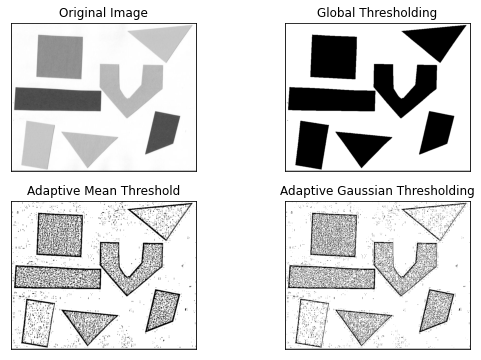

In [4]:
ret,thresh_global = cv.threshold(gray_image,thresh,255,cv.THRESH_BINARY)
thresh_mean = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
thresh_gaussian = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

cols= 2
rows= 2
img_index=0

fig, ax= plt.subplots(nrows=rows, ncols=cols, figsize=(9,6))
for i in range(rows):
    for j in range(cols):
        ax[i][j].imshow(images[img_index], 'gray')
        ax[i][j].set_title(names[img_index])
        ax[i][j].set_xticks([]), ax[i][j].set_yticks([])
        
        img_index+= 1
    
plt.show()

## 2. Data Text

#### a. Tokenisasi dengan library TF

Mengimport library tokenizer dari tensorflow

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Membuat modelnya

In [6]:
tokenizer= Tokenizer(num_words=15, oov_token='-')

Berikut merupakan daftar teks yang akan dilakukan tokenisasi

In [7]:
teks = [
    'Saya suka menonton drama korea',
    'drama korea sangat menyenangkan!',
    'ikhsan sedang menonton tv',
    'drama korea start-up mempertontonkan kisah cinta nam do san dan seo dal mi'
        ]

Meng-fit data teks tadi dari model yang sudah dibangun sebelumnya

In [8]:
tokenizer.fit_on_texts(teks)
sequences= tokenizer.texts_to_sequences(teks)

tokenizer.word_index

{'-': 1,
 'drama': 2,
 'korea': 3,
 'menonton': 4,
 'saya': 5,
 'suka': 6,
 'sangat': 7,
 'menyenangkan': 8,
 'ikhsan': 9,
 'sedang': 10,
 'tv': 11,
 'start': 12,
 'up': 13,
 'mempertontonkan': 14,
 'kisah': 15,
 'cinta': 16,
 'nam': 17,
 'do': 18,
 'san': 19,
 'dan': 20,
 'seo': 21,
 'dal': 22,
 'mi': 23}

Mengelompokkan beberapa kata berdasarkan panjang tertentu

In [9]:
sequences_samapanjang= pad_sequences(sequences)
sequences_samapanjang

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  6,  4,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  7,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 10,  4, 11],
       [ 2,  3, 12, 13, 14,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [10]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)
sequences_samapanjang

array([[ 5,  6,  4,  2,  3],
       [ 2,  3,  7,  8,  0],
       [ 9, 10,  4, 11,  0],
       [ 1,  1,  1,  1,  1]])

In [11]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')
sequences_samapanjang

array([[ 5,  6,  4,  2,  3],
       [ 2,  3,  7,  8,  0],
       [ 9, 10,  4, 11,  0],
       [ 2,  3, 12, 13, 14]])

#### b. Tokenisasi menggunakan NLTK

Mengimport librarynya

In [12]:
import nltk

# Method untuk mendownload teks popular untuk dilakukan teks mining
# nltk.download('popular')

Melakukan tokenisasi kata pada teks T

In [13]:
T = "hi ikhsan! drakor ini sangat bagus ceritanya, mari nonton drakor itu yuk"
Word_Tokens= nltk.word_tokenize(T)
Word_Tokens

['hi',
 'ikhsan',
 '!',
 'drakor',
 'ini',
 'sangat',
 'bagus',
 'ceritanya',
 ',',
 'mari',
 'nonton',
 'drakor',
 'itu',
 'yuk']

Melakukan tokenisasi kalimat

In [14]:
Sentence_Tokens= nltk.sent_tokenize(T)
Sentence_Tokens

['hi ikhsan!', 'drakor ini sangat bagus ceritanya, mari nonton drakor itu yuk']

#### c. Tokenisasi menggunakan Spacy

Mengimport library tokenisasi untuk bahasa indonesia lalu melakukan tokenisasi

In [15]:
# Contoh Tokenisasi dalam bahasa Indonesia dengan Spacy
from spacy.lang.id import Indonesian

nlp_id = Indonesian()

teks = 'hari itu, ikhsan nonton film korea di taman. takdim membeli oleh-oleh di pasar'
tokenS_id = nlp_id(teks)

[t for t in tokenS_id]

[hari,
 itu,
 ,,
 ikhsan,
 nonton,
 film,
 korea,
 di,
 taman,
 .,
 takdim,
 membeli,
 oleh-oleh,
 di,
 pasar]

Membandingkan hasil nya dengan hasil tokenisasi dari library English (bahasa inggris)

In [16]:
from spacy.lang.en import English
nlp_en = English()
tokenS_en = nlp_en(teks)
[token.text for token in tokenS_en]

['hari',
 'itu',
 ',',
 'ikhsan',
 'nonton',
 'film',
 'korea',
 'di',
 'taman',
 '.',
 'takdim',
 'membeli',
 'oleh',
 '-',
 'oleh',
 'di',
 'pasar']

## 3. Data Audio

Mengimport libary librosa

In [1]:
import librosa

Melihat sampel data audio librosa apa saja yang bisa dipakai

In [2]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


Meload data audio lalu mem-print tipe data nya

In [3]:
audio_data = librosa.util.example('brahms')
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [4]:
librosa.load(audio_data, sr=44100)

(array([-2.9152667e-05, -1.5879310e-05,  2.3102011e-06, ...,
        -7.6272258e-06, -6.4033611e-06, -4.8083275e-06], dtype=float32),
 44100)

Mengimport libary IPython, yang nantinya fungsi display digunakan untuk memutar audio

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

Mem-plot amplitudo dari gelombang suara dari audio

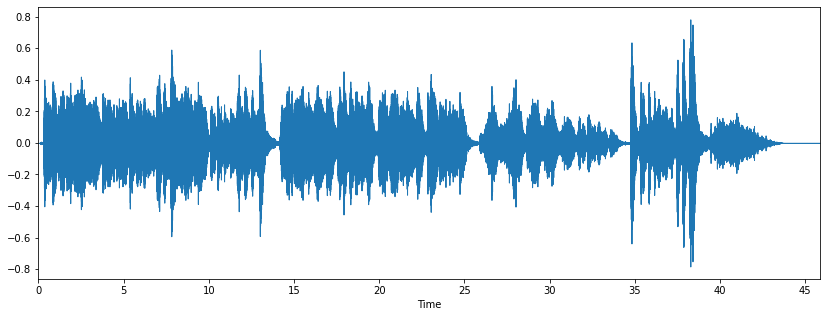

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Mem-plot spectogram dari audio

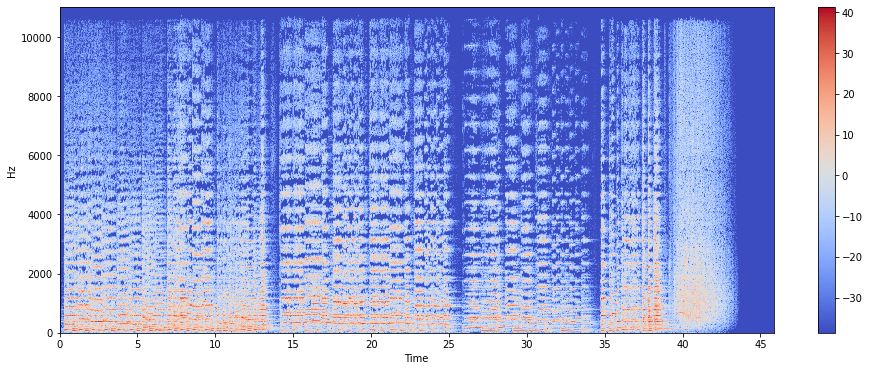

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(16, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Juga melakukan plotting spectogram, tapi dengan axis y yang dinormalisasi menggunakan logaritma

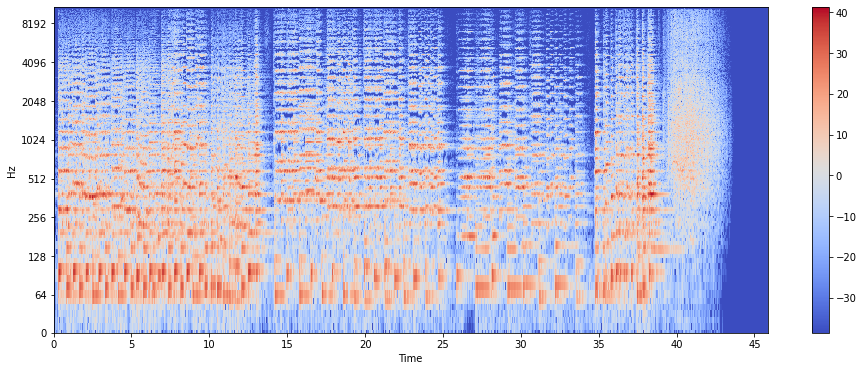

In [8]:
plt.figure(figsize=(16, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Membuat gelombang suara

In [9]:
import numpy as np
import soundfile as sf

sr = 22050
T = 5.0
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = 0.5*np.sin(2*np.pi*220*t)

Memutar gelombang suara yang dibuat

In [10]:
ipd.Audio(x, rate=sr) # load a NumPy array

Menyimpan gelombang suara yang dibuat

In [11]:
sf.write('tone_22.wav', x, sr)

#### Plot Spectral Centroid (SC) 

Digunakan untuk mengukur posisi dan bentuk spektral dari titik keseimbangan distribusi energi. Secara sederhana spectral centroid disebut gravitasi dari spektrum.

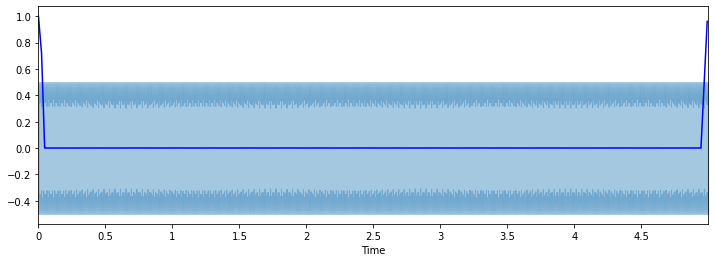

In [12]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

#### Plot Spectral Rolloff (SR) 
Digunakan untuk menentukan nilai frekuensi yang terletak dibawah nilai distribusi spektrum (biasanya bernilai 90%) terkonsentrasi

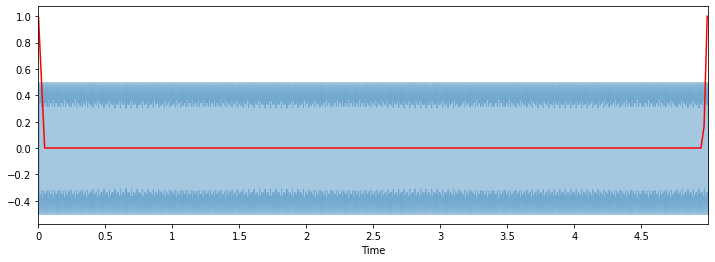

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#### Plot spectral bandwith

Bandwidth spektral merupakan lebar pita cahaya pada setengah puncak maksimum (atau lebar penuh pada setengah maksimum [FWHM]) dan diwakili oleh dua garis merah vertikal dan SB pada sumbu panjang gelombang.

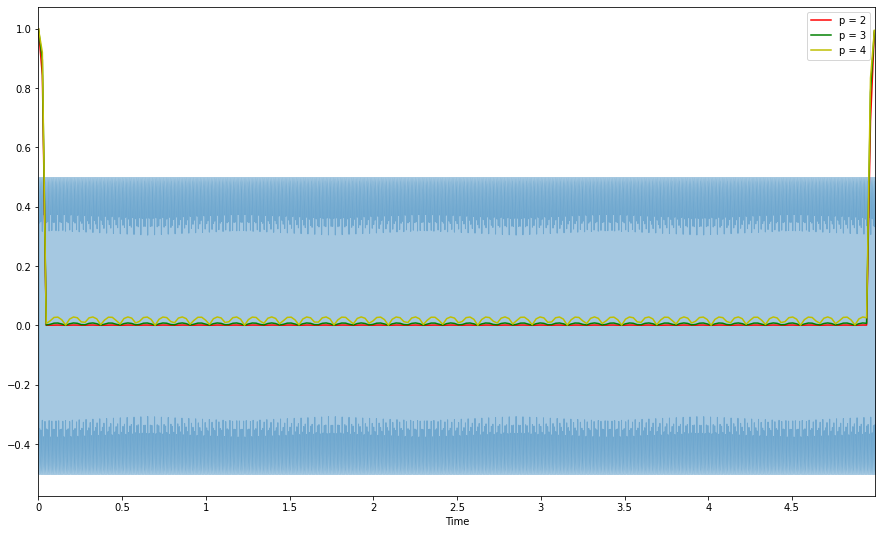

In [14]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#### Zero-Crossing Rate

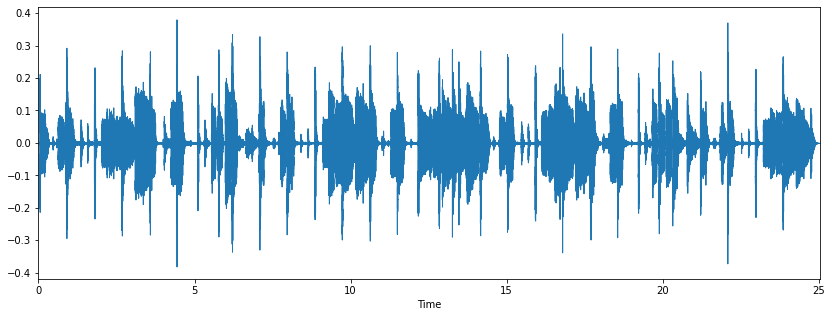

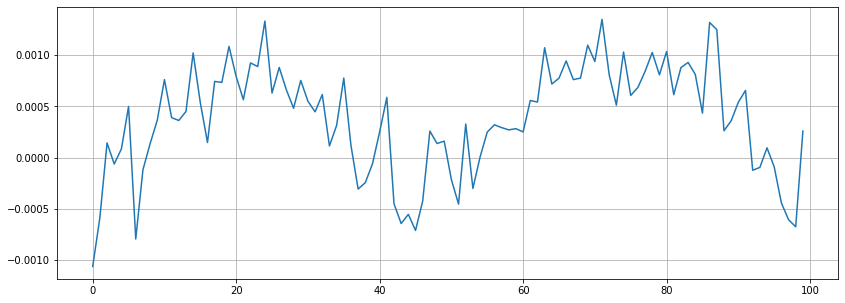

In [15]:
audio_data = librosa.util.example('choice')
x , sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

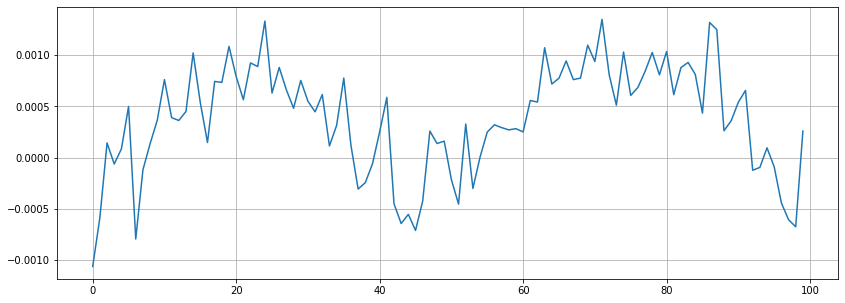

In [16]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [17]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

17


#### Mel-Frequency Cepstrum Coefficients (MFCC) 

MFCC adalah salah satu bentuk representasi cepstral dari sinyal dimana frekuensi didistribusi berdasarkan skala mel bukan secara pendekatan linear.

(20, 1078)


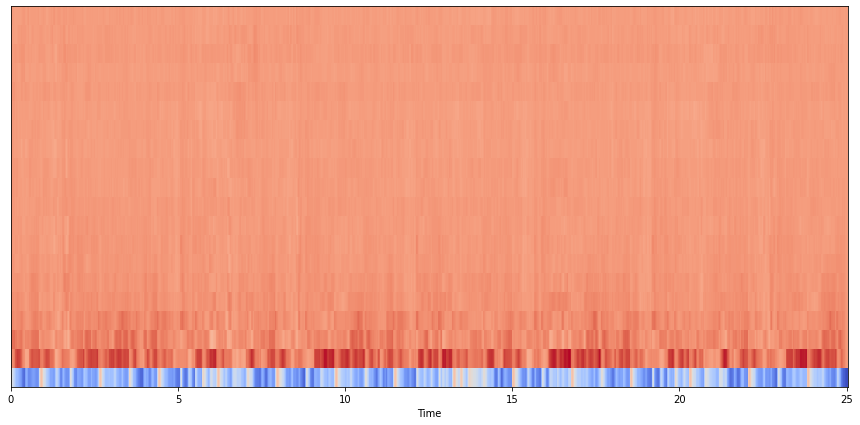

In [18]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#### Chroma feature

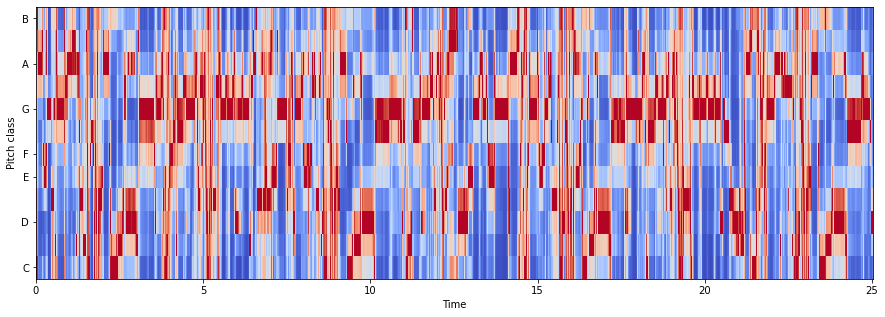

In [19]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')